#  Project1_TF-IDF +Visualization

運用TF-IDF的方式分析文檔，並用視覺化的方式呈現，並探討相關的問題。

# 前言
本人非常討厭社會科，在考學測的時候，賽對了很多提，於是想藉由統計的方式，教教莘莘學子該猜什麼答案

### 目標
1. 統計出近20年學測社會科常用的字
2. 尋找這些字和答案的關系
3. 預測明年試題方向

### 程式



In [3]:
import jieba
import sys

創建一個函數，可以自動抓取資料夾中的.txt檔，除去掉一些無關的字後，轉換成文字輸出

In [4]:
def openfile(filePath):
    paragraph=""
    with open(filePath,encoding = 'utf8') as f:
        for ele in f:
            ele=ele.replace(" ","").replace("1","").replace("2","").replace("3","").replace("4","").replace("5","").replace("6","").replace("7","").replace("8","").replace("9","").replace("0","").replace("(A)","").replace("(B)","").replace("(C)","").replace("(D)","").replace("，","").replace("。","")
            ele=ele.strip()
            paragraph+=ele
        return paragraph

用jieba.cut切出不同的詞，以間格為空格的方式輸出

In [5]:
def cutParagraph(uncuted):
    result = []
    file_list=uncuted
    seg_list = jieba.cut(file_list,cut_all=True)
    for seg in seg_list :
        seg = ''.join(seg.split())
        result.append(seg)
    a=" ".join(result)
    return a

In [6]:
corpus=[]
import glob, os
for file in glob.glob("*.txt"):
    txt=openfile(file)
    corpus.append(cutParagraph(txt))    

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\alixh\AppData\Local\Temp\jieba.cache
Loading model cost 0.856 seconds.
Prefix dict has been built succesfully.


In [54]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction
import operator

vectorizer = CountVectorizer()
transformer=TfidfTransformer()
X = transformer.fit_transform(vectorizer.fit_transform(corpus))
X.toarray()           
word=vectorizer.get_feature_names()#获取词袋模型中的所有词语  
weight=X.toarray()#将tf-idf矩阵抽取出来，元素a[i][j]表示j词在i类文本中的tf-idf权重
ls=[]
for i in range(len(weight)):#打印每类文本的tf-idf词语权重，第一个for遍历所有文本，第二个for便利某一类文本下的词语权重  
    dic={}
    print(u"-------这里输出第",i,u"类文本的词语tf-idf权重------")
    for j in range(len(word)):
        if weight[i][j]>0.06:
            dic[word[j]]=weight[i][j]
            print(word[j],weight[i][j])
    sorted_dic = sorted(dic.items(), key=operator.itemgetter(1))
    ls.append(sorted_dic)

-------这里输出第 0 类文本的词语tf-idf权重------
下列 0.262380546946
世界 0.0636127826118
人口 0.104952218778
何者 0.127225565224
侵害 0.0785891906163
公斤 0.276720578365
公路 0.0865750410343
分布 0.0706808695687
分析 0.108186135771
北半球 0.062871352493
半球 0.0666981154812
可能 0.162566000008
妹妹 0.11097130347
孝文帝 0.0665827820817
政府 0.120157478267
政治 0.0848170434824
教育 0.0899590446671
旅行者 0.0665827820817
日本 0.149931741112
晴天 0.0665827820817
有罪 0.0691801445912
民法 0.0721458675286
水量 0.07573029504
照片 0.0762395916769
爸爸 0.0665827820817
程度 0.0986062015567
耗水 0.155359824857
耗水量 0.155359824857
自我 0.123958116017
路段 0.133165564163
都市 0.157428328167
雨天 0.0887770427757
需求 0.0715747584156
需求量 0.0966419902591
高等 0.103770216887
高等教育 0.115970388311
-------这里输出第 1 类文本的词语tf-idf权重------
cd 0.0657935996255
一定 0.100247083552
下列 0.214824246213
不一 0.0685575298767
丙丁 0.103708256793
主政 0.0748326903082
主要 0.0907960480869
乙丙 0.0963005241646
乙方 0.0877247995006
人口 0.0814850589085
人次 0.0657935996255
人民 0.0888927915366
何者 0.125717605043
作物 0.070863604

自我 0.0880602555292
英法 0.0631767490645
著名 0.0744400278618
血肉 0.07883438095
造成 0.0798840035156
-------这里输出第 11 类文本的词语tf-idf权重------
一位 0.0985791517792
下列 0.224043526771
丙丁 0.0716939285667
中山 0.155243265074
乙丙 0.0627321874959
人口 0.116502633921
人民 0.0716939285667
何者 0.0929444308113
先生 0.133366354319
初婚 0.106127877191
可能 0.168989874202
同性 0.112738659133
商人 0.0683550535952
地形 0.0706300961305
基因 0.0924239776688
塞北 0.115529972086
外籍 0.143520808277
婚前 0.184847955338
宗教 0.0716939285667
工作 0.0716939285667
平原 0.148184838132
年度 0.135191899362
找到 0.0620256796665
政府 0.118292911942
文化 0.101393924521
有人 0.0683550535952
朝代 0.0691163839712
甲乙 0.0627321874959
科技 0.0970216881209
科第 0.0911400714603
程度 0.08572950862
西部 0.0740924190658
部分 0.076056471194
都市 0.0985791517792
都市人 0.063787025901
都市人口 0.063787025901
高原 0.0689970066995
-------这里输出第 12 类文本的词语tf-idf权重------
mm 0.104199367997
一位 0.0631778900587
下列 0.252711560235
丙丁 0.0992795415207
中山 0.0868590248013
主要 0.0936047867253
乙丙 0.0992795415207
人口 0.1263557801

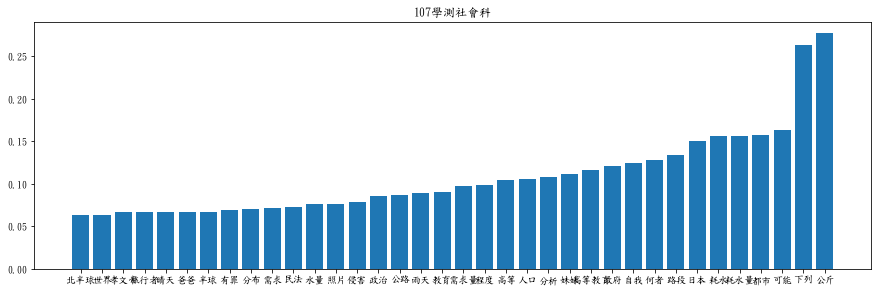

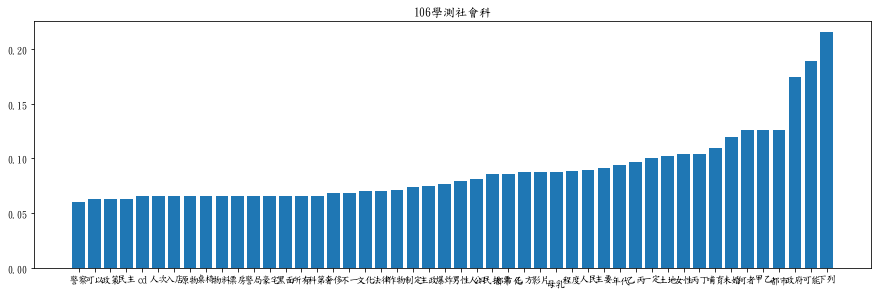

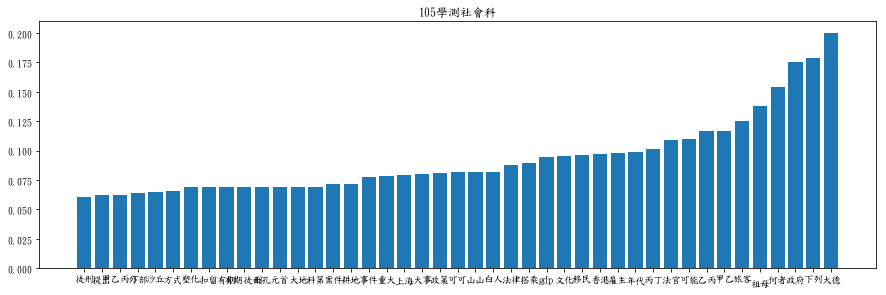

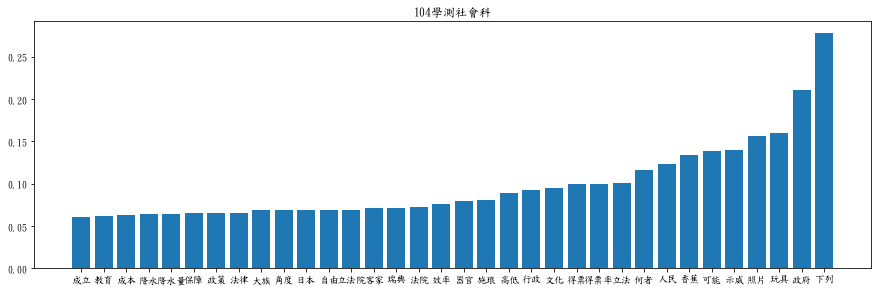

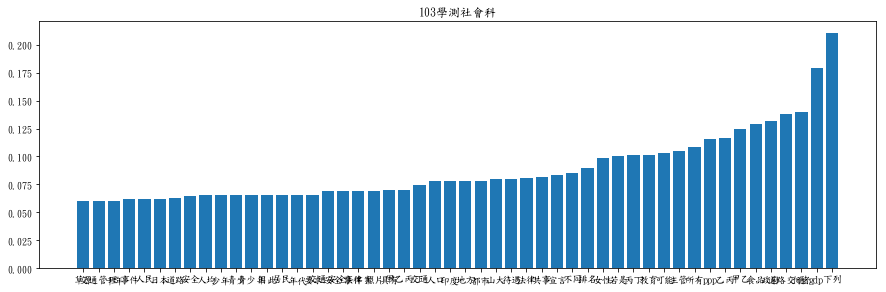

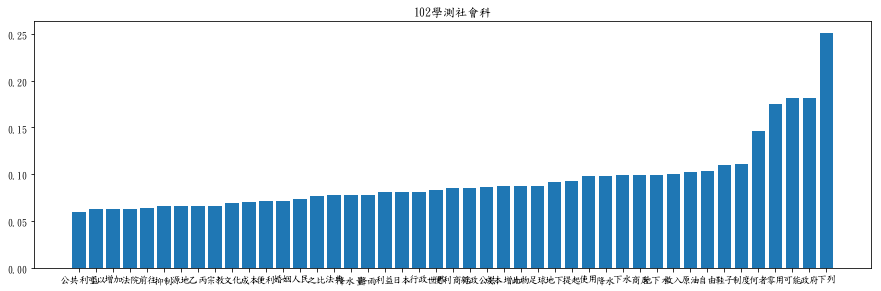

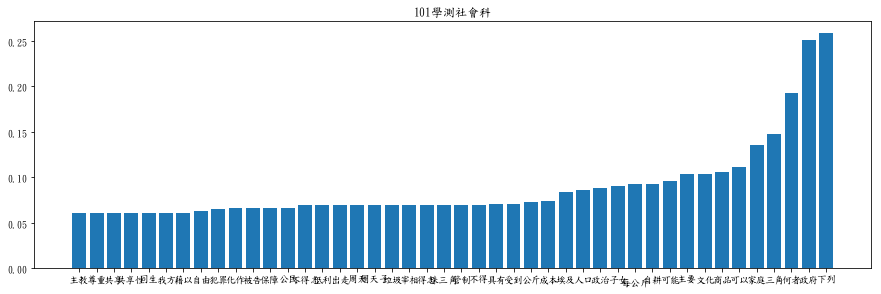

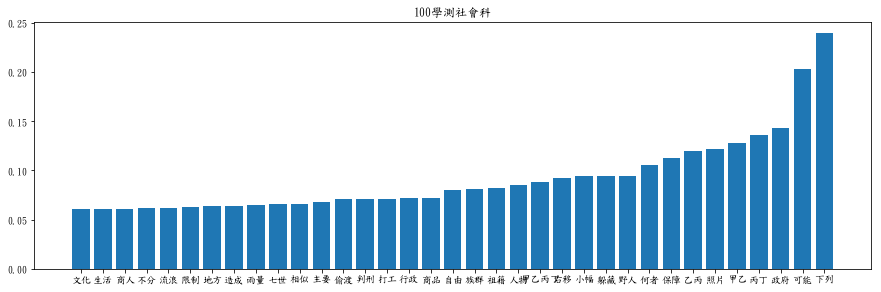

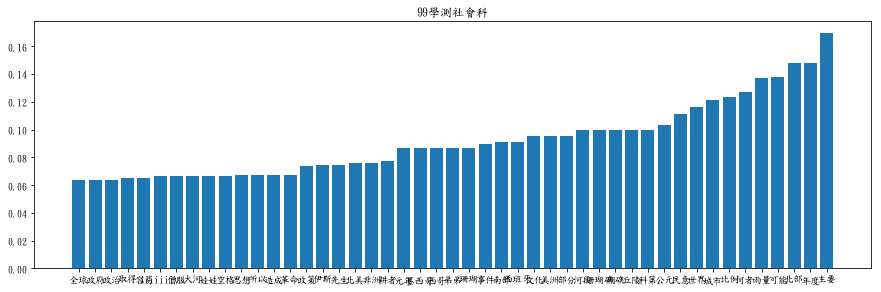

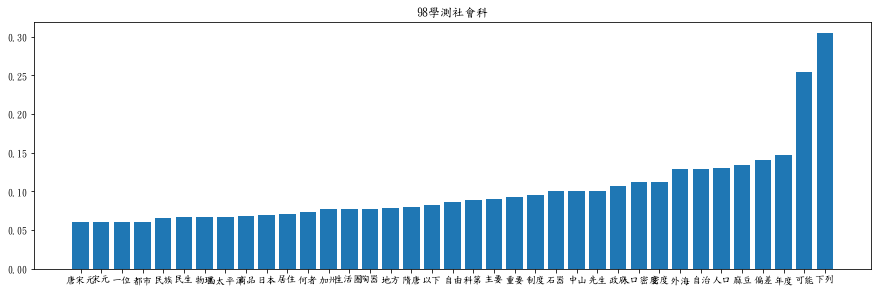

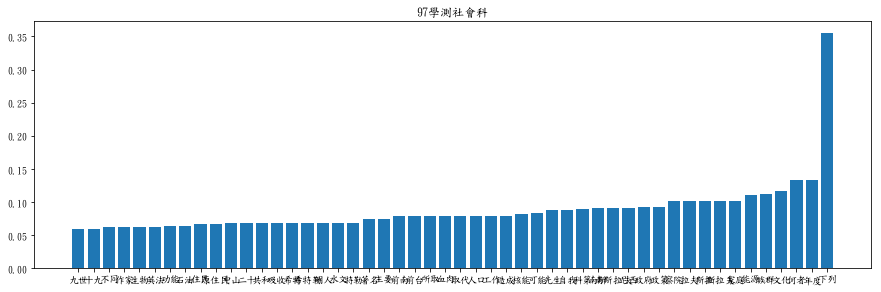

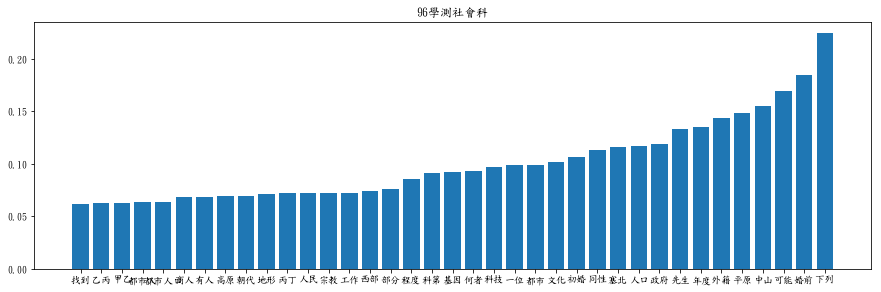

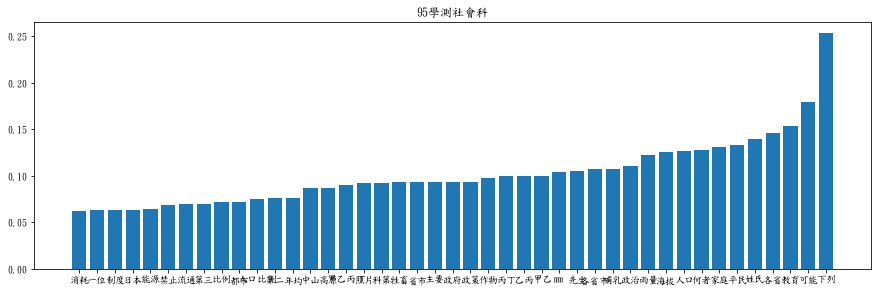

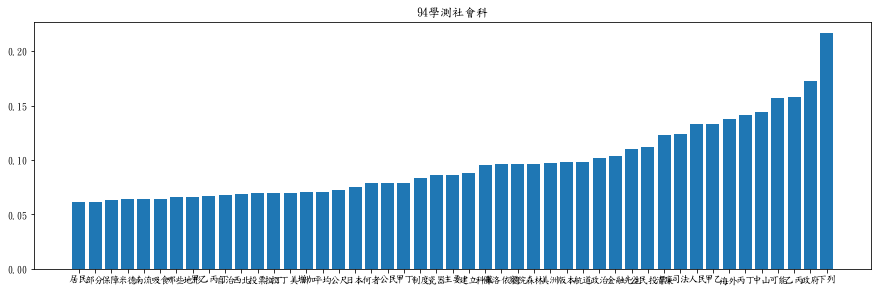

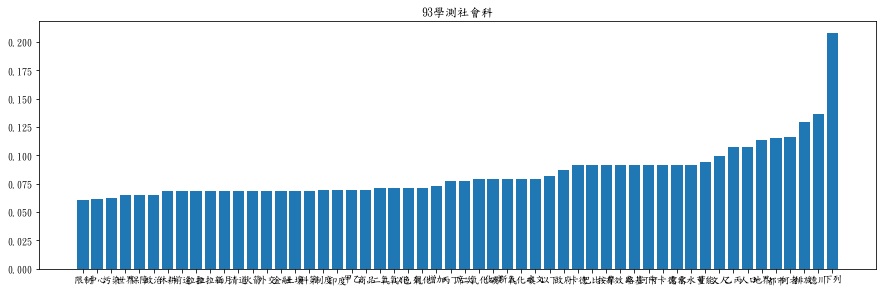

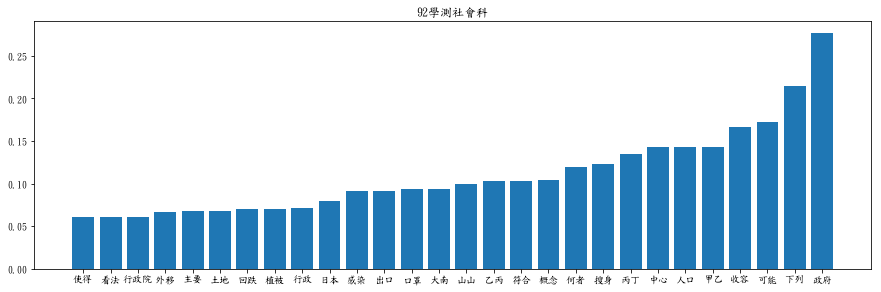

In [55]:
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict

plt.rcParams["figure.figsize"] =[15,10]
for index,ele in enumerate(ls):
    ordered_dic=OrderedDict(ls[index])
    plt.subplot(211)
    xticks = np.arange(len(ordered_dic)) + 1
    plt.bar(xticks, ordered_dic.values(), align='center')
    plt.xticks(xticks, list(ordered_dic.keys()))
    plt.title(str(107-index)+"學測社會科")
    plt.show()

以上是分析的結果，圖中顯示tf-idf词语权重>0.06的詞語，可以看出分布蠻平均的，可以看出每年幾乎都會有不同的詞語出現，代表有好好出題！，接下來分析甚麼樣的敘述容易被當成答案

先將所有的選項儲存在matrix當中，此matrix為 (題數)X(選項數) 的矩陣